In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#그래프에서 한글 출력 시 폰트 변경(기본폰트: sans-serif)
plt.rcParams['font.family'] = 'Malgun Gothic'
# 그래프에서 마이너스(-) 폰트 깨짐 방지
plt.rcParams['axes.unicode_minus']=False

In [3]:
sns.set(style="darkgrid")

# 데이터 불러오기 & 필요한 데이터 Filter

In [4]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
386  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
387  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
388  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
389  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
390  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

In [5]:
cut_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','HDL_1','HDL_2','TG_1','TG_2','LDL_1','LDL_2','MD_wine_1','MD_wine_2','SMOKE_1','SMOKE_2','PSQI_TOTAL_1','PSQI_TOTAL_2']]

In [6]:
cut_df

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2
0,S0001,SMI,2,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0
2,S0003,SMI,2,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0
3,S0004,SMI,2,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0
4,S0005,SMI,2,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MetS_S0280,MetS,1,F,24,61,NaN,51,NaN,120,NaN,0.0,0.0,1,1,5.0,NaN
387,MetS_S0281,MetS,1,F,44,45,NaN,104,NaN,103,NaN,0.0,0.0,1,1,3.0,NaN
388,MetS_S0282,MetS,1,F,37,53,NaN,128,NaN,82,NaN,0.0,0.0,1,1,3.0,NaN
389,MetS_S0283,MetS,1,M,51,57,NaN,163,NaN,150,NaN,0.0,0.0,1,1,5.0,NaN


In [7]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
cut_df = cut_df[(cut_df['COHORT'] != 3)]
cut_df

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2
0,S0001,SMI,2,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0
2,S0003,SMI,2,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0
3,S0004,SMI,2,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0
4,S0005,SMI,2,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MetS_S0280,MetS,1,F,24,61,NaN,51,NaN,120,NaN,0.0,0.0,1,1,5.0,NaN
387,MetS_S0281,MetS,1,F,44,45,NaN,104,NaN,103,NaN,0.0,0.0,1,1,3.0,NaN
388,MetS_S0282,MetS,1,F,37,53,NaN,128,NaN,82,NaN,0.0,0.0,1,1,3.0,NaN
389,MetS_S0283,MetS,1,M,51,57,NaN,163,NaN,150,NaN,0.0,0.0,1,1,5.0,NaN


In [8]:
cut_df_n=cut_df.dropna()
cut_df_n.reset_index(drop=True, inplace=True)
cut_df_n.isnull().sum()

Sample_ID       0
GROUP           0
COHORT          0
SEX             0
AGE             0
HDL_1           0
HDL_2           0
TG_1            0
TG_2            0
LDL_1           0
LDL_2           0
MD_wine_1       0
MD_wine_2       0
SMOKE_1         0
SMOKE_2         0
PSQI_TOTAL_1    0
PSQI_TOTAL_2    0
dtype: int64

# TC 데이터 추가

In [9]:
#TC = HDL-C + LDL-C + TG/5

tc_1_list=[]
tc_2_list=[]

for index, row in cut_df_n.iterrows():

    tc_1=int(row[4])+int(row[8])+int(row[6])/5
    tc_1_list.append(tc_1)

    tc_2=int(row[5])+int(row[9])+int(row[7])/5
    tc_2_list.append(tc_2)

len(tc_1_list)

235

In [10]:
TC_df=pd.DataFrame({'TC_1':tc_1_list,'TC_2':tc_2_list})

cut_df_t=pd.concat([cut_df_n,TC_df], axis=1)

cut_df_t

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,2,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,150.4,188.2
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0,173.8,158.2
2,S0003,SMI,2,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,243.0,241.2
3,S0004,SMI,2,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,129.8,221.8
4,S0005,SMI,2,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,97.4,218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,1,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,122.2,132.8
231,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,143.2,120.4
232,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,135.8,169.6
233,MetS_S0222,MetS,1,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,135.0,123.0


# PSQI 점수와 혈중 지질 농도(TG, LDL)

In [12]:
df_psqi = cut_df.dropna(subset = ['PSQI_TOTAL_1','PSQI_TOTAL_2','HDL_2','TG_2','LDL_2'])
df_psqi.isnull().sum()

Sample_ID       0
GROUP           0
COHORT          0
SEX             0
AGE             0
HDL_1           0
HDL_2           0
TG_1            0
TG_2            0
LDL_1           0
LDL_2           0
MD_wine_1       5
MD_wine_2       5
SMOKE_1         0
SMOKE_2         0
PSQI_TOTAL_1    0
PSQI_TOTAL_2    0
dtype: int64

In [13]:
df_psqi

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2
0,S0001,SMI,2,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0
2,S0003,SMI,2,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0
3,S0004,SMI,2,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0
4,S0005,SMI,2,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,MetS_S0217,MetS,1,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0
324,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0
326,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0
328,MetS_S0222,MetS,1,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0


# 불량 수면과 정상 수면의 평균 데이터 확인(변화 전 기준)

In [15]:
#Filter 적용
df_psqi = df_psqi[(df_psqi['TG_1'] <= 300) & (df_psqi['TG_2'] <= 300) & (df_psqi['LDL_1'] <= 300) & (df_psqi['LDL_2'] <= 300)]

good_psqi_1_check = df_psqi[(df_psqi['PSQI_TOTAL_1'] < 6)]
good_psqi_2_check = df_psqi[(df_psqi['PSQI_TOTAL_2'] < 6)]

bad_psqi_1_check = df_psqi[(df_psqi['PSQI_TOTAL_1'] >= 6)]
bad_psqi_2_check = df_psqi[(df_psqi['PSQI_TOTAL_2'] >= 6)]


#불량 수면과 혈중 지질 농도 평균
good_psqi_1_tg_1_mean = good_psqi_1_check['TG_1'].mean()
good_psqi_2_tg_2_mean = good_psqi_2_check['TG_2'].mean()

bad_psqi_1_tg_1_mean = bad_psqi_1_check['TG_1'].mean()
bad_psqi_2_tg_2_mean = bad_psqi_2_check['TG_2'].mean()

good_psqi_1_ldl_1_mean = good_psqi_1_check['LDL_1'].mean()
good_psqi_2_ldl_2_mean = good_psqi_2_check['LDL_2'].mean()

bad_psqi_1_ldl_1_mean = bad_psqi_1_check['LDL_1'].mean()
bad_psqi_2_ldl_2_mean = bad_psqi_2_check['LDL_2'].mean()


print("\n<정상 TG>\n")
print(f'첫 번째 방문 때 정상 수면 TG 평균: {good_psqi_1_tg_1_mean}')
print(f'두 번째 방문 때 정상 수면 TG 평균: {good_psqi_2_tg_2_mean}')
print("\n<정상 LDL>\n")
print(f'첫 번째 방문 때 정상 수면 LDL 평균: {good_psqi_1_ldl_1_mean}')
print(f'두 번째 방문 때 정상 수면 LDL 평균: {good_psqi_2_ldl_2_mean}')



print("\n<불량 TG>\n")
print(f'첫 번째 방문 때 불량 수면 TG 평균: {bad_psqi_1_tg_1_mean}')
print(f'두 번째 방문 때 불량 수면 TG 평균: {bad_psqi_2_tg_2_mean}')
print("\n<불량 LDL>\n")
print(f'첫 번째 방문 때 불량 수면 LDL 평균: {bad_psqi_1_ldl_1_mean}')
print(f'두 번째 방문 때 불량 수면 LDL 평균: {bad_psqi_2_ldl_2_mean}')


<정상 TG>

첫 번째 방문 때 정상 수면 TG 평균: 95.11805555555556
두 번째 방문 때 정상 수면 TG 평균: 99.8972602739726

<정상 LDL>

첫 번째 방문 때 정상 수면 LDL 평균: 110.34027777777777
두 번째 방문 때 정상 수면 LDL 평균: 109.9041095890411

<불량 TG>

첫 번째 방문 때 불량 수면 TG 평균: 104.6
두 번째 방문 때 불량 수면 TG 평균: 97.47727272727273

<불량 LDL>

첫 번째 방문 때 불량 수면 LDL 평균: 119.02222222222223
두 번째 방문 때 불량 수면 LDL 평균: 107.14772727272727


# 방문 때 차이로 PSQI 점수 변화에 따른 혈중 지질 농도 변화 확인하기

In [13]:
#Filter 적용
df_psqi = df_psqi[(df_psqi['TG_1'] <= 300) & (df_psqi['TG_2'] <= 300) & (df_psqi['LDL_1'] <= 300) & (df_psqi['LDL_2'] <= 300)]

#PSQI 점수 변화 별 새로운 pd 생성
change_pd = {
    'Sample_ID' : [],
    'GROUP' : [],
    'SEX' : [],
    'AGE' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
    'PSQI_TOTAL' : []
}
change_pd = pd.DataFrame(change_pd)
change_pd

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL,PSQI_TOTAL


In [14]:
for index, row in df_psqi.iterrows():

    HDL=int(row[6])-int(row[5])
    TG=int(row[8])-int(row[7])
    LDL=int(row[10])-int(row[9])
    PSQI=int(row[16])-int(row[15])
    
    #데이터 추가
    change_pd.loc[len(change_pd)] = [row[0],row[1],row[3],row[4],HDL,TG,LDL,PSQI]
    
change_pd

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL,PSQI_TOTAL
0,S0001,SMI,M,60.0,16.0,-6.0,1.0,-1.0
1,S0002,SMI,M,61.0,-1.0,-5.0,0.0,4.0
2,S0003,SMI,F,52.0,0.0,-48.0,-27.0,1.0
3,S0004,SMI,F,41.0,-4.0,-16.0,-26.0,0.0
4,S0005,SMI,F,41.0,-9.0,-28.0,-9.0,-2.0
...,...,...,...,...,...,...,...,...
229,MetS_S0217,MetS,F,63.0,11.0,-18.0,-9.0,5.0
230,MetS_S0218,MetS,M,57.0,0.0,14.0,9.0,-1.0
231,MetS_S0220,MetS,F,35.0,-9.0,3.0,-11.0,1.0
232,MetS_S0222,MetS,F,61.0,2.0,-3.0,1.0,-1.0


In [15]:
change_pd['PSQI_TOTAL'].value_counts()

 0.0     51
-1.0     39
 2.0     28
 1.0     28
-2.0     26
 3.0     17
-3.0     13
-4.0      8
 4.0      7
-6.0      5
 5.0      4
-5.0      3
 6.0      2
-7.0      1
-8.0      1
-11.0     1
Name: PSQI_TOTAL, dtype: int64

In [16]:
#cohort3 제외
#10개 이하 데이터 제거
change_pd = change_pd[(change_pd['PSQI_TOTAL'] <= 3.0) & (change_pd['PSQI_TOTAL'] >= -3.0)]
change_pd['PSQI_TOTAL'].value_counts()

 0.0    51
-1.0    39
 2.0    28
 1.0    28
-2.0    26
 3.0    17
-3.0    13
Name: PSQI_TOTAL, dtype: int64

#cohort3 포함
#10개 이하 데이터 제거
change_pd = change_pd[(change_pd['PSQI_TOTAL'] < 5.0) & (change_pd['PSQI_TOTAL'] > -4.0)]
change_pd['PSQI_TOTAL'].value_counts()

In [17]:
#새로운 변화 표 생성
change_psqi_tg = pd.DataFrame(change_pd.groupby(['PSQI_TOTAL']).TG.mean())
change_psqi_ldl = pd.DataFrame(change_pd.groupby(['PSQI_TOTAL']).LDL.mean())

change_psqi=pd.concat([change_psqi_tg, change_psqi_ldl],axis=1)
change_psqi

,TG,LDL
PSQI_TOTAL,,
-3.0,9.692308,-13.692308
-2.0,0.692308,-0.230769
-1.0,4.538462,-6.333333
0.0,-1.803922,-4.843137
1.0,-4.500000,-2.535714
2.0,5.392857,-2.857143
3.0,0.470588,-6.823529


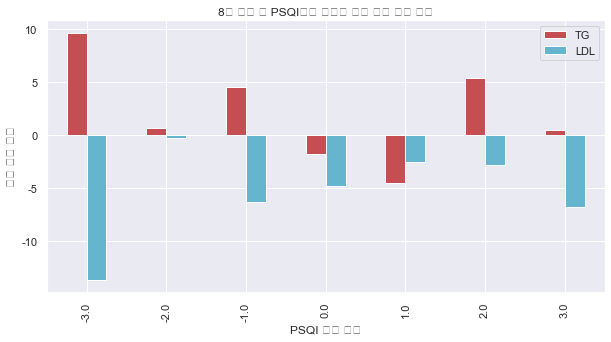

In [40]:
change_psqi_lipids_bar=change_psqi.plot.bar(color=['r','c'],title='8주 방문 간 PSQI점수 차이에 따른 혈중 지질 변화')
change_psqi_lipids_bar.set_xlabel('PSQI 점수 차이')
change_psqi_lipids_bar.set_ylabel('혈중 지질 차이')
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
plt.show()

# 최적 절단점을 기준으로 혈중 지질 변화 확인하기 part

In [11]:
df_psqi

NameError: name 'df_psqi' is not defined

In [20]:
#첫 방문때 6점 이상, 두 번째 방문때 6점 이하 (8주간 수면의 질 개선 데이터)
df_psqi_good = df_psqi[(df_psqi['PSQI_TOTAL_1'] >= 6.0) & (df_psqi['PSQI_TOTAL_2'] < 6.0)] 
df_psqi_good

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2
25,M0003,SMI,2,F,62,56,56.0,94,80.0,140,137.0,0.0,0.0,1,1,14.0,3.0
29,M0007,SMI,2,F,56,80,77.0,99,135.0,148,126.0,0.0,0.0,1,1,7.0,5.0
32,M0010,SMI,2,M,66,48,45.0,73,70.0,173,89.0,0.0,0.0,1,1,6.0,5.0
148,MetS_S0035,MetS,1,F,20,85,78.0,72,57.0,121,129.0,0.0,0.0,1,1,6.0,5.0
152,MetS_S0039,MetS,1,F,22,79,79.0,114,64.0,98,92.0,0.0,0.0,1,1,6.0,5.0
167,MetS_S0055,MetS,1,M,35,53,50.0,91,98.0,90,113.0,0.0,0.0,1,1,11.0,5.0
174,MetS_S0062,MetS,1,M,31,61,45.0,115,187.0,118,107.0,0.0,0.0,1,1,8.0,3.0
183,MetS_S0071,MetS,1,M,38,52,48.0,129,173.0,193,176.0,0.0,0.0,1,1,9.0,5.0
185,MetS_S0073,MetS,1,M,35,42,41.0,61,112.0,136,139.0,0.0,0.0,1,1,6.0,4.0
188,MetS_S0076,MetS,1,F,25,57,51.0,93,72.0,87,92.0,0.0,0.0,1,1,8.0,4.0


In [21]:
#첫 방문때 6점 이하, 두 번째 방문때 6점 이상 (8주간 수면의 질 저하 데이터)
df_psqi_bad = df_psqi[(df_psqi['PSQI_TOTAL_1'] < 6.0) & (df_psqi['PSQI_TOTAL_2'] >= 6.0)] 
df_psqi_bad

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0
20,S0021,SMI,2,M,65,44,43.0,155,117.0,96,89.0,0.0,0.0,2,2,5.0,11.0
33,M0011,SMI,2,F,66,48,53.0,166,113.0,127,128.0,0.0,0.0,1,1,5.0,8.0
118,MetS_S0004,MetS,1,M,46,68,64.0,111,127.0,160,121.0,NaN,NaN,1,1,5.0,6.0
131,MetS_S0018,MetS,1,M,38,50,53.0,86,88.0,102,91.0,0.0,0.0,1,1,4.0,8.0
156,MetS_S0044,MetS,1,M,28,73,68.0,123,136.0,112,115.0,0.0,0.0,3,3,5.0,6.0
165,MetS_S0053,MetS,1,M,26,72,81.0,82,49.0,102,87.0,0.0,0.0,1,1,5.0,6.0
166,MetS_S0054,MetS,1,M,36,53,50.0,68,142.0,132,140.0,0.0,0.0,1,1,5.0,7.0
170,MetS_S0058,MetS,1,F,29,86,82.0,67,53.0,112,97.0,0.0,0.0,1,1,4.0,6.0
177,MetS_S0065,MetS,1,M,30,50,45.0,176,177.0,151,149.0,0.0,0.0,1,1,3.0,6.0


In [22]:
print(len(df_psqi_good),len(df_psqi_bad))

30 28


In [32]:
#Filter 적용
df_psqi_good = df_psqi_good[(df_psqi_good['TG_1'] <= 300) & (df_psqi_good['TG_2'] <= 300) & (df_psqi_good['LDL_1'] <= 300) & (df_psqi_good['LDL_2'] <= 300)]
df_psqi_bad = df_psqi_bad[(df_psqi_bad['TG_1'] <= 300) & (df_psqi_bad['TG_2'] <= 300) & (df_psqi_bad['LDL_1'] <= 300) & (df_psqi_bad['LDL_2'] <= 300)]

#PSQI 점수 변화 별 새로운 pd 생성
good_pd = {
    'Sample_ID' : [],
    'GROUP' : [],
    'SEX' : [],
    'AGE' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
}

bad_pd = {
    'Sample_ID' : [],
    'GROUP' : [],
    'SEX' : [],
    'AGE' : [],
    'HDL' : [],
    'TG' : [],
    'LDL' : [],
}
good_pd = pd.DataFrame(good_pd)
bad_pd = pd.DataFrame(bad_pd)

In [33]:
#good_pd 생성
for index, row in df_psqi_good.iterrows():

    HDL=int(row[6])-int(row[5])
    TG=int(row[8])-int(row[7])
    LDL=int(row[10])-int(row[9])
    
    #데이터 추가
    good_pd.loc[len(good_pd)] = [row[0],row[1],row[3],row[4],HDL,TG,LDL]
    
good_pd

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL
0,M0003,SMI,F,62.0,0.0,-14.0,-3.0
1,M0007,SMI,F,56.0,-3.0,36.0,-22.0
2,M0010,SMI,M,66.0,-3.0,-3.0,-84.0
3,MetS_S0035,MetS,F,20.0,-7.0,-15.0,8.0
4,MetS_S0039,MetS,F,22.0,0.0,-50.0,-6.0
5,MetS_S0055,MetS,M,35.0,-3.0,7.0,23.0
6,MetS_S0062,MetS,M,31.0,-16.0,72.0,-11.0
7,MetS_S0071,MetS,M,38.0,-4.0,44.0,-17.0
8,MetS_S0073,MetS,M,35.0,-1.0,51.0,3.0
9,MetS_S0076,MetS,F,25.0,-6.0,-21.0,5.0


In [34]:
#bad_pd 생성
for index, row in df_psqi_bad.iterrows():

    HDL=int(row[6])-int(row[5])
    TG=int(row[8])-int(row[7])
    LDL=int(row[10])-int(row[9])
    
    #데이터 추가
    bad_pd.loc[len(bad_pd)] = [row[0],row[1],row[3],row[4],HDL,TG,LDL]
    
bad_pd

,Sample_ID,GROUP,SEX,AGE,HDL,TG,LDL
0,S0002,SMI,M,61.0,-1.0,-5.0,0.0
1,S0021,SMI,M,65.0,-1.0,-38.0,-7.0
2,M0011,SMI,F,66.0,5.0,-53.0,1.0
3,MetS_S0004,MetS,M,46.0,-4.0,16.0,-39.0
4,MetS_S0018,MetS,M,38.0,3.0,2.0,-11.0
5,MetS_S0044,MetS,M,28.0,-5.0,13.0,3.0
6,MetS_S0053,MetS,M,26.0,9.0,-33.0,-15.0
7,MetS_S0054,MetS,M,36.0,-3.0,74.0,8.0
8,MetS_S0058,MetS,F,29.0,-4.0,-14.0,-15.0
9,MetS_S0065,MetS,M,30.0,-5.0,1.0,-2.0


In [41]:
#good의 혈중 지질 농도 평균 변화
good_psqi_tg_mean = good_pd['TG'].mean()
good_psqi_ldl_mean = good_pd['LDL'].mean()

print(good_psqi_tg_mean, good_psqi_ldl_mean)

7.733333333333333 -5.033333333333333


In [42]:
#bad의 혈중 지질 농도 평균 변화
bad_psqi_tg_mean = bad_pd['TG'].mean()
bad_psqi_ldl_mean = bad_pd['LDL'].mean()

print(bad_psqi_tg_mean, bad_psqi_ldl_mean)

-10.0 -11.428571428571429


# 이전에 작업했던 PSQI와 혈중 지질 농도 확인 part

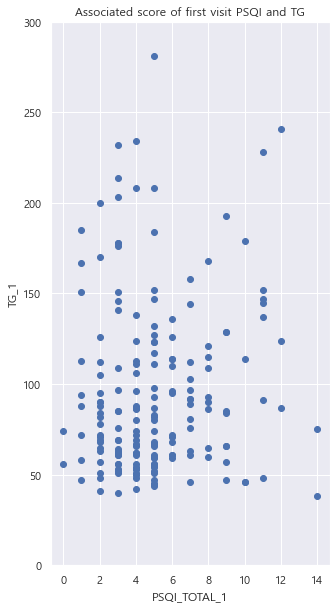

In [60]:
#TG와 PSQI
x_value=df_psqi[['PSQI_TOTAL_1']].values.tolist()
y_value=df_psqi[['TG_1']].values.tolist()


plt.scatter(x_value, y_value)
plt.ylim([0, 300])


plt.xlabel('PSQI_TOTAL_1')
plt.ylabel('TG_1')
plt.title('Associated score of first visit PSQI and TG')
plt.rcParams["figure.figsize"] = (5,10)

plt.show()

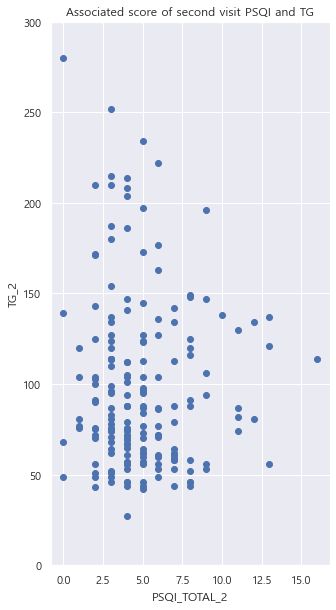

In [61]:
#TG와 PSQI
x_value=df_psqi[['PSQI_TOTAL_2']].values.tolist()
y_value=df_psqi[['TG_2']].values.tolist()


plt.scatter(x_value, y_value)
plt.ylim([0, 300])


plt.xlabel('PSQI_TOTAL_2')
plt.ylabel('TG_2')
plt.title('Associated score of second visit PSQI and TG')
plt.rcParams["figure.figsize"] = (5,10)

plt.show()

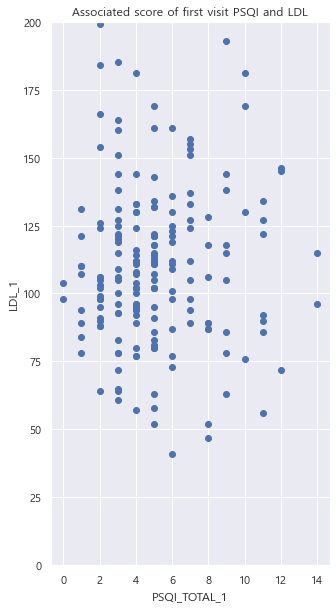

In [62]:
#LDL과 PSQI
df_s = cut_df_t.sort_values(by=["PSQI_TOTAL_1"], ascending=[True])
x_value=df_s[['PSQI_TOTAL_1']].values.tolist()
y_value=df_s[['LDL_1']].values.tolist()


plt.scatter(x_value, y_value)
plt.ylim([0, 200])


plt.xlabel('PSQI_TOTAL_1')
plt.ylabel('LDL_1')
plt.title('Associated score of first visit PSQI and LDL')
plt.rcParams["figure.figsize"] = (5,10)

plt.show()

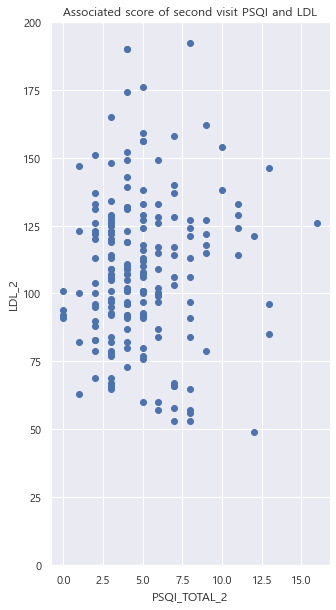

In [63]:
#LDL과 PSQI
df_s = cut_df_t.sort_values(by=["PSQI_TOTAL_2"], ascending=[True])
x_value=df_s[['PSQI_TOTAL_2']].values.tolist()
y_value=df_s[['LDL_2']].values.tolist()


plt.scatter(x_value, y_value)
plt.ylim([0, 200])


plt.xlabel('PSQI_TOTAL_2')
plt.ylabel('LDL_2')
plt.title('Associated score of second visit PSQI and LDL')
plt.rcParams["figure.figsize"] = (5,10)

plt.show()

In [48]:
df_psqi = df_psqi[(df_psqi['TG_1'] <= 300) & (df_psqi['TG_2'] <= 300) & (df_psqi['LDL_1'] <= 200) & (df_psqi['LDL_2'] <= 200)]
tg_psqi = pd.DataFrame(df_psqi.groupby(['PSQI_TOTAL_1']).TG_1.mean())
ldl_psqi = pd.DataFrame(df_psqi.groupby(['PSQI_TOTAL_1']).LDL_1.mean())

psqi_1=pd.concat([tg_psqi,ldl_psqi],axis=1)
psqi_1

,TG_1,LDL_1
PSQI_TOTAL_1,,
0.0,65.000000,101.000000
1.0,108.333333,102.666667
2.0,87.500000,114.954545
3.0,103.214286,110.321429
4.0,85.333333,106.800000
5.0,91.666667,108.777778
6.0,91.000000,104.615385
7.0,93.384615,125.769231
8.0,100.777778,89.222222


In [49]:
tg_psqi = pd.DataFrame(df_psqi.groupby(['PSQI_TOTAL_2']).TG_2.mean())
ldl_psqi = pd.DataFrame(df_psqi.groupby(['PSQI_TOTAL_2']).LDL_2.mean())

psqi_2=pd.concat([tg_psqi,ldl_psqi],axis=1)
psqi_2

,TG_2,LDL_2
PSQI_TOTAL_2,,
0.0,134.000000,94.500000
1.0,91.600000,103.000000
2.0,100.055556,107.666667
3.0,108.200000,105.085714
4.0,90.722222,114.611111
5.0,93.900000,111.033333
6.0,98.411765,104.941176
7.0,78.076923,101.000000
8.0,90.250000,91.166667


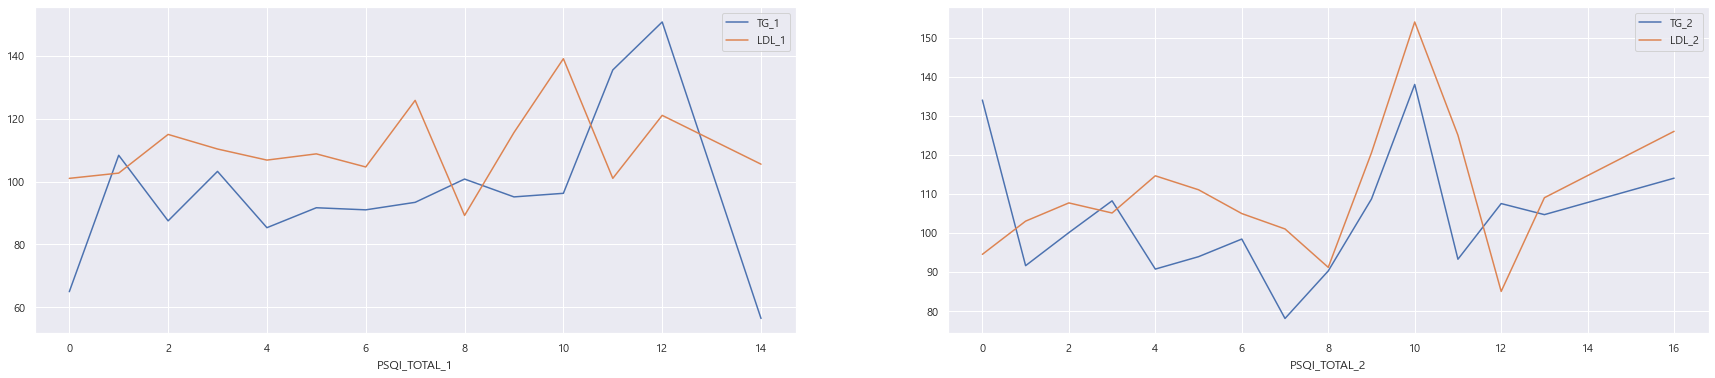

In [51]:
fig, ax = plt.subplots(1,2)

psqi_1.plot(kind='line', ax=ax[0])    # bar(수직막대)
psqi_2.plot(kind='line', ax=ax[1])
plt.rcParams['figure.figsize'] = [30, 6] # [width, height] (inches)
plt.show()

# SMOKE 와 혈중 지질 농도

In [92]:
df_smoke = cut_df_t.dropna(subset = ['SMOKE_1','SMOKE_2','TG_1','TG_2','LDL_1','LDL_2','HDL_1','HDL_2','TC_1','TC_2'])
df_smoke.isnull().sum()
df_smoke = df_smoke[(df_smoke['SMOKE_2'] != -9) & (df_smoke['SMOKE_1'] != 0) & (df_smoke['SMOKE_2'] != 0)]

df_smoke

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,MetS_S0011,MetS,1,F,30,77,72.0,69,76.0,88,88.0,0.0,0.0,1,1,2.0,2.0,120.4,178.8
1,MetS_S0012,MetS,1,F,29,69,60.0,48,69.0,92,92.0,0.0,0.0,1,1,4.0,4.0,110.0,170.6
3,MetS_S0014,MetS,1,F,26,54,50.0,59,61.0,91,101.0,0.0,0.0,1,1,5.0,4.0,97.0,156.8
4,MetS_S0016,MetS,1,F,27,58,62.0,38,44.0,96,84.0,0.0,0.0,1,1,14.0,8.0,83.4,161.6
5,MetS_S0018,MetS,1,M,38,50,53.0,86,88.0,102,91.0,0.0,0.0,1,1,4.0,8.0,136.6,169.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,MetS_S0217,MetS,1,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,122.2,132.8
185,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,143.2,120.4
186,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,135.8,169.6
187,MetS_S0222,MetS,1,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,135.0,123.0


# 방문 때 차이로 흡연 점수 변화에 따른 혈중 지질 농도 변화 확인하기

In [93]:
#과거흡연자를 비흡연자로 바꿈

df_smoke = df_smoke.replace({'SMOKE_1': 2}, {'SMOKE_1': 1})
df_smoke = df_smoke.replace({'SMOKE_2': 2}, {'SMOKE_2': 1})
df_smoke

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,MetS_S0011,MetS,1,F,30,77,72.0,69,76.0,88,88.0,0.0,0.0,1,1,2.0,2.0,120.4,178.8
1,MetS_S0012,MetS,1,F,29,69,60.0,48,69.0,92,92.0,0.0,0.0,1,1,4.0,4.0,110.0,170.6
3,MetS_S0014,MetS,1,F,26,54,50.0,59,61.0,91,101.0,0.0,0.0,1,1,5.0,4.0,97.0,156.8
4,MetS_S0016,MetS,1,F,27,58,62.0,38,44.0,96,84.0,0.0,0.0,1,1,14.0,8.0,83.4,161.6
5,MetS_S0018,MetS,1,M,38,50,53.0,86,88.0,102,91.0,0.0,0.0,1,1,4.0,8.0,136.6,169.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,MetS_S0217,MetS,1,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,122.2,132.8
185,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,143.2,120.4
186,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,135.8,169.6
187,MetS_S0222,MetS,1,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,135.0,123.0


df_smoke = df_smoke[(df_smoke['SMOKE_1'] == 3) & (df_smoke['SMOKE_2'] == 1)]
df_smoke

#-> 8주간 SMOKE 값이 변한 사람이 없음 = 금연자, 추가흡연자 없음.

# 이전에 작업했던 SMOKE와 혈중 지질 농도 확인 part

In [94]:
#과거흡연자를 비흡연자로 바꿈

df_smoke = df_smoke.replace({'SMOKE_1': 2}, {'SMOKE_1': 1})
df_smoke = df_smoke.replace({'SMOKE_2': 2}, {'SMOKE_2': 1})
df_smoke

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,MetS_S0011,MetS,1,F,30,77,72.0,69,76.0,88,88.0,0.0,0.0,1,1,2.0,2.0,120.4,178.8
1,MetS_S0012,MetS,1,F,29,69,60.0,48,69.0,92,92.0,0.0,0.0,1,1,4.0,4.0,110.0,170.6
3,MetS_S0014,MetS,1,F,26,54,50.0,59,61.0,91,101.0,0.0,0.0,1,1,5.0,4.0,97.0,156.8
4,MetS_S0016,MetS,1,F,27,58,62.0,38,44.0,96,84.0,0.0,0.0,1,1,14.0,8.0,83.4,161.6
5,MetS_S0018,MetS,1,M,38,50,53.0,86,88.0,102,91.0,0.0,0.0,1,1,4.0,8.0,136.6,169.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,MetS_S0217,MetS,1,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,122.2,132.8
185,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,143.2,120.4
186,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,135.8,169.6
187,MetS_S0222,MetS,1,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,135.0,123.0


In [95]:
tg_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_1']).TG_1.mean())
ldl_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_1']).LDL_1.mean())
tc_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_1']).TC_1.mean())

smoke_1=pd.concat([tg_smoke,ldl_smoke,tc_smoke],axis=1)
smoke_1

,TG_1,LDL_1,TC_1
SMOKE_1,,,
1,101.649425,111.718391,151.801149
3,182.769231,109.384615,198.523077


In [96]:
tg_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_2']).TG_2.mean())
ldl_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_2']).LDL_2.mean())
tc_smoke = pd.DataFrame(df_smoke.groupby(['SMOKE_2']).TC_2.mean())

smoke_2=pd.concat([tg_smoke,ldl_smoke,tc_smoke],axis=1)
smoke_2

,TG_2,LDL_2,TC_2
SMOKE_2,,,
1,100.994253,109.764368,193.186207
3,150.923077,106.307692,201.476923


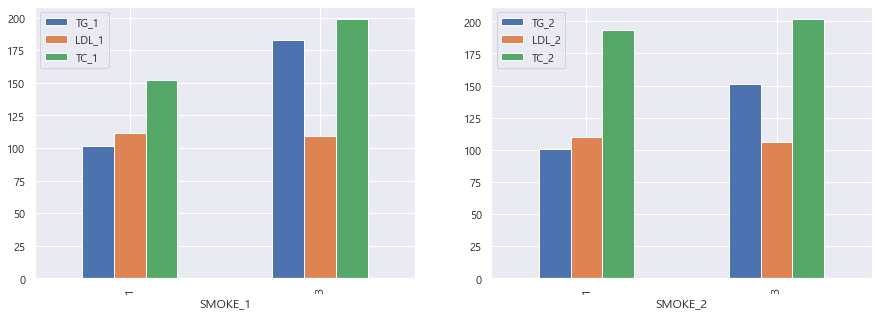

In [97]:
fig, ax = plt.subplots(1,2)

smoke_1.plot(kind='bar', ax=ax[0])    # bar(수직막대)
smoke_2.plot(kind='bar', ax=ax[1])

plt.rcParams["figure.figsize"] = (15,5)
plt.show()

# WINE(알코올)과 혈중 지질 농도

In [98]:
df_wine = cut_df_t.dropna(subset = ['MD_wine_1','MD_wine_2','TG_1','TG_2','LDL_1','LDL_2','HDL_1','HDL_2','TC_1','TC_2'])
df_wine.isnull().sum()

df_wine

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,MetS_S0011,MetS,1,F,30,77,72.0,69,76.0,88,88.0,0.0,0.0,1,1,2.0,2.0,120.4,178.8
1,MetS_S0012,MetS,1,F,29,69,60.0,48,69.0,92,92.0,0.0,0.0,1,1,4.0,4.0,110.0,170.6
2,MetS_S0013,MetS,1,F,26,71,59.0,58,49.0,110,91.0,0.0,0.0,0,-9,1.0,0.0,86.8,192.6
3,MetS_S0014,MetS,1,F,26,54,50.0,59,61.0,91,101.0,0.0,0.0,1,1,5.0,4.0,97.0,156.8
4,MetS_S0016,MetS,1,F,27,58,62.0,38,44.0,96,84.0,0.0,0.0,1,1,14.0,8.0,83.4,161.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,MetS_S0217,MetS,1,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,122.2,132.8
185,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,143.2,120.4
186,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,135.8,169.6
187,MetS_S0222,MetS,1,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,135.0,123.0


In [99]:
tg_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_1']).TG_1.mean())
ldl_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_1']).LDL_1.mean())
hdl_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_1']).HDL_1.mean())
tc_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_1']).TC_1.mean())

wine_1=pd.concat([tg_wine,ldl_wine,hdl_wine,tc_wine],axis=1)
wine_1

,TG_1,LDL_1,HDL_1,TC_1
MD_wine_1,,,,
0.0,106.354839,111.537634,60.817204,154.375269
1.0,281.000000,115.000000,48.000000,280.400000


In [100]:
tg_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_2']).TG_2.mean())
ldl_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_2']).LDL_2.mean())
hdl_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_2']).HDL_2.mean())
tc_wine = pd.DataFrame(df_smoke.groupby(['MD_wine_2']).TC_2.mean())

wine_2=pd.concat([tg_wine,ldl_wine,hdl_wine,tc_wine],axis=1)
wine_2

,TG_2,LDL_2,HDL_2,TC_2
MD_wine_2,,,,
0.0,103.897849,109.693548,59.483871,193.625806
1.0,210.000000,78.000000,47.000000,219.200000


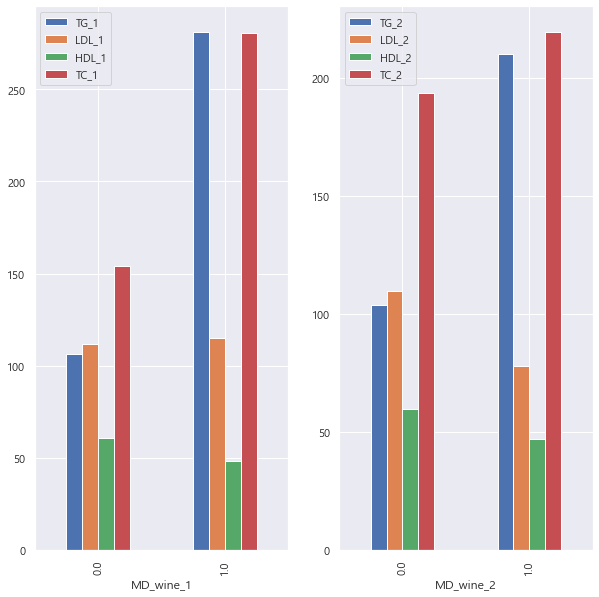

In [106]:
fig, ax = plt.subplots(1,2)

wine_1.plot(kind='bar', ax=ax[0])    # bar(수직막대)
wine_2.plot(kind='bar', ax=ax[1])
plt.rcParams["figure.figsize"] = (10,15)
plt.show()

# PSQI와 SMOKE 관계

In [43]:
cut_df_t

,Sample_ID,GROUP,COHORT,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,2,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,150.4,188.2
1,S0002,SMI,2,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,2,2,4.0,8.0,173.8,158.2
2,S0003,SMI,2,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,243.0,241.2
3,S0004,SMI,2,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,129.8,221.8
4,S0005,SMI,2,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,97.4,218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,1,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,122.2,132.8
231,MetS_S0218,MetS,1,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,143.2,120.4
232,MetS_S0220,MetS,1,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,135.8,169.6
233,MetS_S0222,MetS,1,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,135.0,123.0


In [44]:
df_rel = cut_df_t.dropna(subset = ['PSQI_TOTAL_1','PSQI_TOTAL_2','SMOKE_1','SMOKE_2','TG_1','TG_2','LDL_1','LDL_2','HDL_1','HDL_2','TC_1','TC_2'])
#df_rel.isnull().sum()
df_rel['SMOKE_1'].value_counts() #흡연자의 데이터가 너무 작다
#df_rel['SMOKE_2'].value_counts()

1    195
2     23
3     15
0      2
Name: SMOKE_1, dtype: int64

In [41]:
#잘못된 데이터 필터
df_rel = df_rel[(df_rel['SMOKE_2'] != -9) & (df_rel['SMOKE_1'] != 0) & (df_rel['SMOKE_2'] != 0)]

#과거흡연자를 흡연자로 바꿈
df_rel = df_rel.replace({'SMOKE_1': 2}, {'SMOKE_1': 3})
df_rel = df_rel.replace({'SMOKE_2': 2}, {'SMOKE_2': 3})
df_rel

,Sample_ID,GROUP,SEX,AGE,HDL_1,HDL_2,TG_1,TG_2,LDL_1,LDL_2,MD_wine_1,MD_wine_2,SMOKE_1,SMOKE_2,PSQI_TOTAL_1,PSQI_TOTAL_2,TC_1,TC_2
0,S0001,SMI,M,60,61,77.0,81,75.0,111,112.0,0.0,0.0,3,3,8.0,7.0,188.2,204.0
1,S0002,SMI,M,61,60,59.0,106,101.0,77,77.0,0.0,1.0,1,1,4.0,8.0,158.2,156.2
2,S0003,SMI,F,52,40,40.0,231,183.0,155,128.0,0.0,0.0,1,1,3.0,4.0,241.2,204.6
3,S0004,SMI,F,41,58,54.0,94,78.0,145,119.0,0.0,0.0,1,1,6.0,6.0,221.8,188.6
4,S0005,SMI,F,41,81,72.0,70,42.0,123,114.0,0.0,0.0,1,1,10.0,8.0,218.0,194.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,MetS_S0217,MetS,F,63,55,66.0,64,46.0,65,56.0,0.0,0.0,1,1,3.0,8.0,132.8,131.2
231,MetS_S0218,MetS,M,57,51,51.0,62,76.0,57,66.0,0.0,0.0,1,1,4.0,3.0,120.4,132.2
232,MetS_S0220,MetS,F,35,58,49.0,88,91.0,94,83.0,0.0,0.0,1,1,1.0,2.0,169.6,150.2
233,MetS_S0222,MetS,F,61,58,60.0,65,62.0,52,53.0,0.0,0.0,1,1,8.0,7.0,123.0,125.4


In [47]:
#범위 필터
df_rel = df_rel[(df_rel['TG_1'] <= 300) & (df_rel['TG_2'] <= 300) & (df_rel['LDL_1'] <= 200) & (df_rel['LDL_2'] <= 200)]

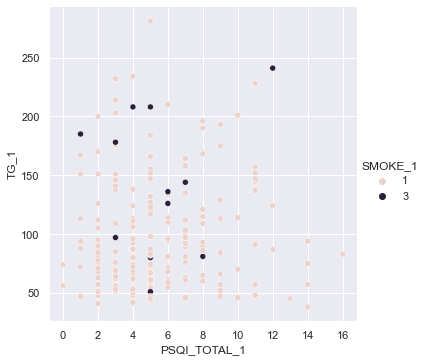

In [49]:
sns.relplot(x='PSQI_TOTAL_1',y='TG_1',hue='SMOKE_1',sizes=(15,200),data=df_rel)

In [50]:
df_rel['SMOKE_1'].value_counts()

1    210
3     14
Name: SMOKE_1, dtype: int64

In [51]:
df_rel['SMOKE_2'].value_counts()

1    209
3     15
Name: SMOKE_2, dtype: int64